<a href="https://colab.research.google.com/github/adrianciemerych/Project-predict-students-dropout-success/blob/main/Project-predict-students-dropout-success/predict_students_dropout_academic_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries and fetching dataset "Predict students' dropout and academic success" from UCI machine learning repository

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [88]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
pprint(predict_students_dropout_and_academic_success.metadata)

# variable information
pprint(predict_students_dropout_and_academic_success.variables)


{'abstract': 'A dataset created from a higher education institution (acquired '
             'from several disjoint databases) related to students enrolled in '
             'different undergraduate degrees, such as agronomy, design, '
             'education, nursing, journalism, management, social service, and '
             'technologies.\n'
             'The dataset includes information known at the time of student '
             'enrollment (academic path, demographics, and social-economic '
             "factors) and the students' academic performance at the end of "
             'the first and second semesters. \n'
             'The data is used to build classification models to predict '
             "students' dropout and academic sucess. The problem is formulated "
             'as a three category classification task, in which there is a '
             'strong imbalance towards one of the classes.',
 'additional_info': {'citation': 'If you use this dataset in experiments for

# 2. Preprocessing and getting acquinted with the data

In [89]:
X.shape

(4424, 36)

In [90]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [91]:
df = pd.concat([X,y], axis = 1)
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [92]:
df.dtypes

Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [93]:
columns = list(df.columns)
columns

['Marital Status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [94]:
# List of continuous numerical columns
numerical_columns = []
numerical_columns.append(columns[6])
numerical_columns.append(columns[12])
numerical_columns.append(columns[19])
numerical_columns = numerical_columns + columns[21:36]
numerical_columns

['Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [95]:
# Checking for null values
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [96]:
df.describe().T
# Numerical variables described and transposed for better look.

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [97]:
# Skewness for individual variables
df.skew()

<ipython-input-97-4152f2e32fd0>:2: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Marital Status                                     4.399764
Application mode                                   0.393036
Application order                                  1.881050
Course                                            -3.809135
Daytime/evening attendance                        -2.507238
Previous qualification                             2.871207
Previous qualification (grade)                     0.312867
Nacionality                                       10.703998
Mother's qualification                             0.001978
Father's qualification                            -0.298697
Mother's occupation                                5.339227
Father's occupation                                5.395173
Admission grade                                    0.530600
Displaced                                         -0.194468
Educational special needs                          9.154976
Debtor                                             2.434652
Tuition fees up to date                 

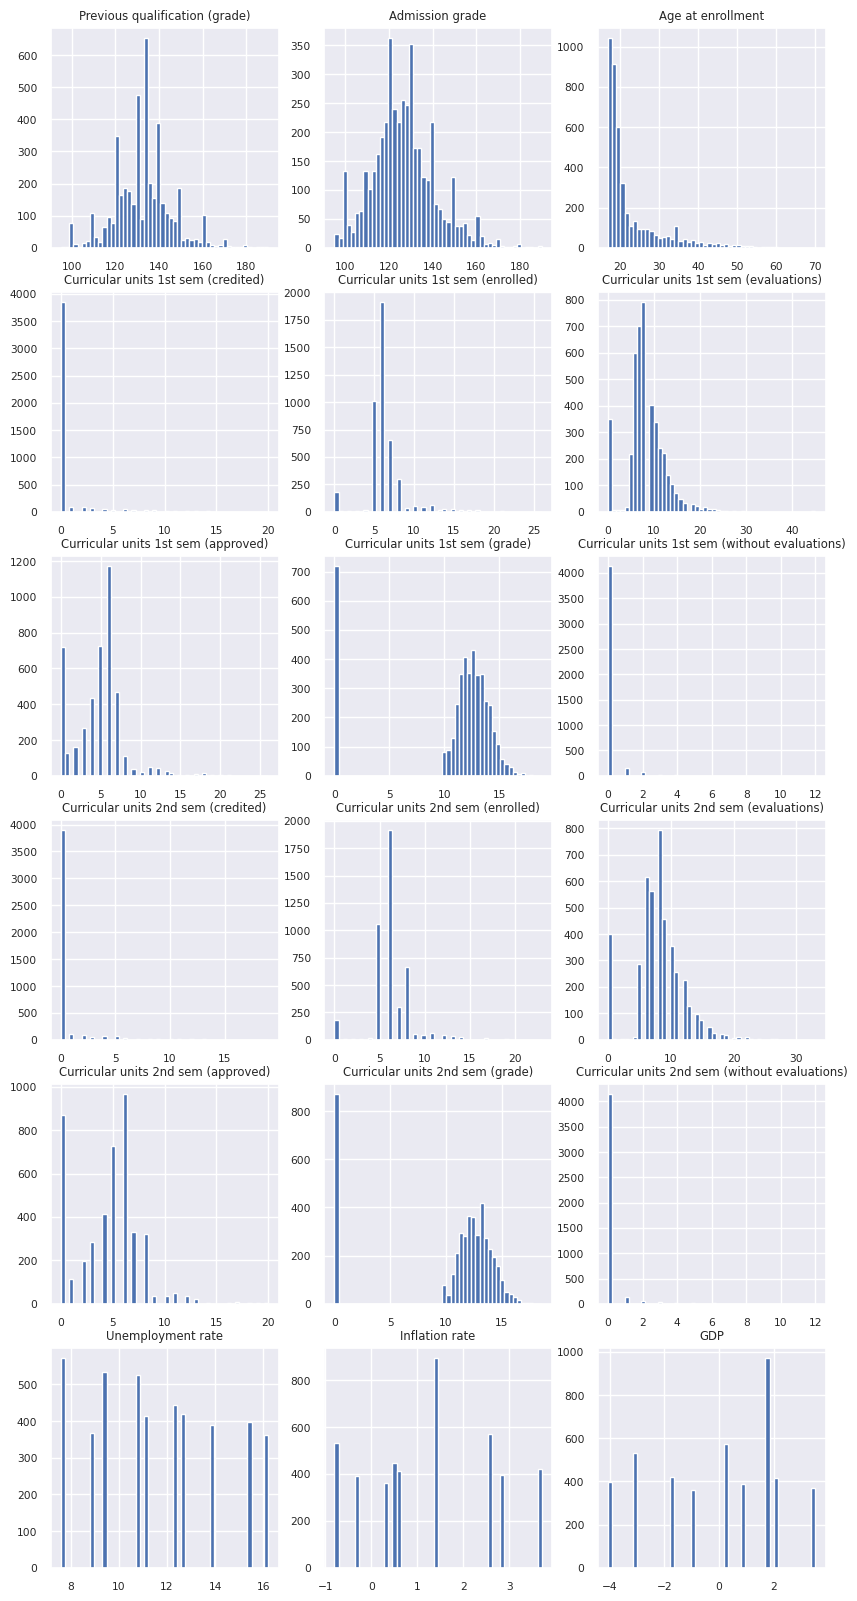

In [98]:
# Histograms for each numerical variable

sns.set(font_scale = 0.7)
def show_histogram(numerical_columns):
  plt.figure(figsize = (10,20))
  i = 0
  for col in numerical_columns:
    plt.subplot(6, 3, i + 1)
    i += 1
    plt.hist(df[col], bins = 50)
    plt.title(col)
  plt.show()

show_histogram(numerical_columns)


In [99]:
# Converting target column to array for show relationships between 2 variables
# having regard to target

target = []
for i in np.ravel(df['Target'].values):
  if i == 'Dropout':
    target.append(0)
  elif i == 'Graduate':
    target.append(1)
  else:
    target.append(2)
print(target)


[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 

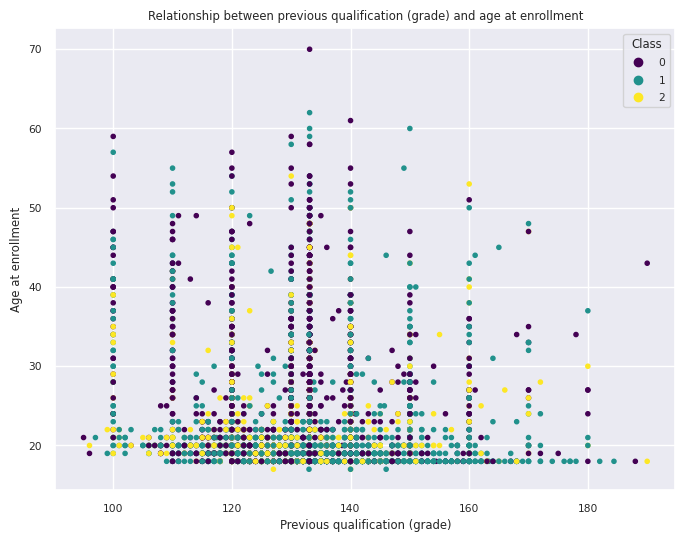

In [100]:
plt.figure(figsize = (8,6))
scatter = plt.scatter(x = df['Previous qualification (grade)'].values, y = df['Age at enrollment'].values,
            c = target, cmap = 'viridis', marker = '.')
plt.legend(*scatter.legend_elements(), title = 'Class')
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Age at enrollment')
plt.title('Relationship between previous qualification (grade) and age at enrollment')
plt.show()

In [101]:
# Searching for outliers in the data.
# Using quantiles we can find the outliers according to the rule of thumb that
# the row which is outlier is over [q3 + 1.5*(q3 - q1)] or under [q1 - 1.5*(q3 - q1)]
# There are quite a lot of them, but they are important for learning
outliers = {}
for col in numerical_columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  list_of_outliers = []
  for row in df[col]:
    if (row > q3 + 1.5 * iqr) | (row < q1 - 1.5 * iqr):
      list_of_outliers.append(row)
  outliers[col] = list_of_outliers

pprint({col : len(outliers[col]) for col in outliers})

{'Admission grade': 86,
 'Age at enrollment': 441,
 'Curricular units 1st sem (approved)': 180,
 'Curricular units 1st sem (credited)': 577,
 'Curricular units 1st sem (enrolled)': 424,
 'Curricular units 1st sem (evaluations)': 158,
 'Curricular units 1st sem (grade)': 726,
 'Curricular units 1st sem (without evaluations)': 294,
 'Curricular units 2nd sem (approved)': 44,
 'Curricular units 2nd sem (credited)': 530,
 'Curricular units 2nd sem (enrolled)': 369,
 'Curricular units 2nd sem (evaluations)': 109,
 'Curricular units 2nd sem (grade)': 877,
 'Curricular units 2nd sem (without evaluations)': 282,
 'GDP': 0,
 'Inflation rate': 0,
 'Previous qualification (grade)': 179,
 'Unemployment rate': 0}


In [102]:
print(outliers['Previous qualification (grade)'])

[100.0, 167.0, 178.0, 99.0, 170.0, 100.0, 100.0, 170.0, 100.0, 188.0, 96.0, 170.0, 166.0, 96.0, 102.0, 101.0, 100.0, 100.0, 180.0, 172.0, 102.0, 170.0, 180.0, 100.0, 100.0, 170.0, 100.0, 100.0, 165.0, 190.0, 100.0, 100.0, 100.0, 164.0, 163.0, 100.0, 100.0, 170.0, 100.0, 163.0, 165.0, 102.0, 100.0, 175.0, 163.0, 170.0, 100.0, 176.0, 100.0, 170.0, 100.0, 168.0, 168.0, 101.0, 170.0, 170.0, 180.0, 100.0, 100.0, 97.0, 100.0, 172.0, 164.0, 101.0, 100.0, 164.0, 100.0, 168.0, 100.0, 170.0, 164.0, 100.0, 170.0, 184.4, 100.0, 100.0, 100.0, 100.0, 174.0, 170.0, 182.0, 167.0, 180.0, 170.0, 99.0, 178.0, 100.0, 100.0, 170.0, 100.0, 95.0, 100.0, 100.0, 100.0, 100.0, 172.0, 170.0, 100.0, 100.0, 170.0, 166.0, 100.0, 100.0, 190.0, 163.3, 100.0, 163.0, 165.0, 172.0, 100.0, 100.0, 100.0, 101.0, 100.0, 170.0, 100.0, 168.0, 100.0, 100.0, 164.0, 163.0, 170.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 172.0, 169.0, 100.0, 100.0, 180.0, 177.0, 165.0, 101.0, 100.0, 177.0, 170.0, 170.0, 102.0, 100.0, 100.0, 102.

In [103]:
pd.set_option("display.max_columns", None)
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# 3. Checking correlation between variables (Spearman's Rank-Order Correlation) and removing non-required columns

In [104]:
# Correlation for numerical data
# In this case was used spearman's Rank-Order Correlation, because variables
# aren't normal distributed
np.set_printoptions(precision = 3, suppress = True)
from scipy import stats
numerical_matrix = stats.spearmanr(pd.concat([df[numerical_columns], df['Target']], axis = 1))[0]

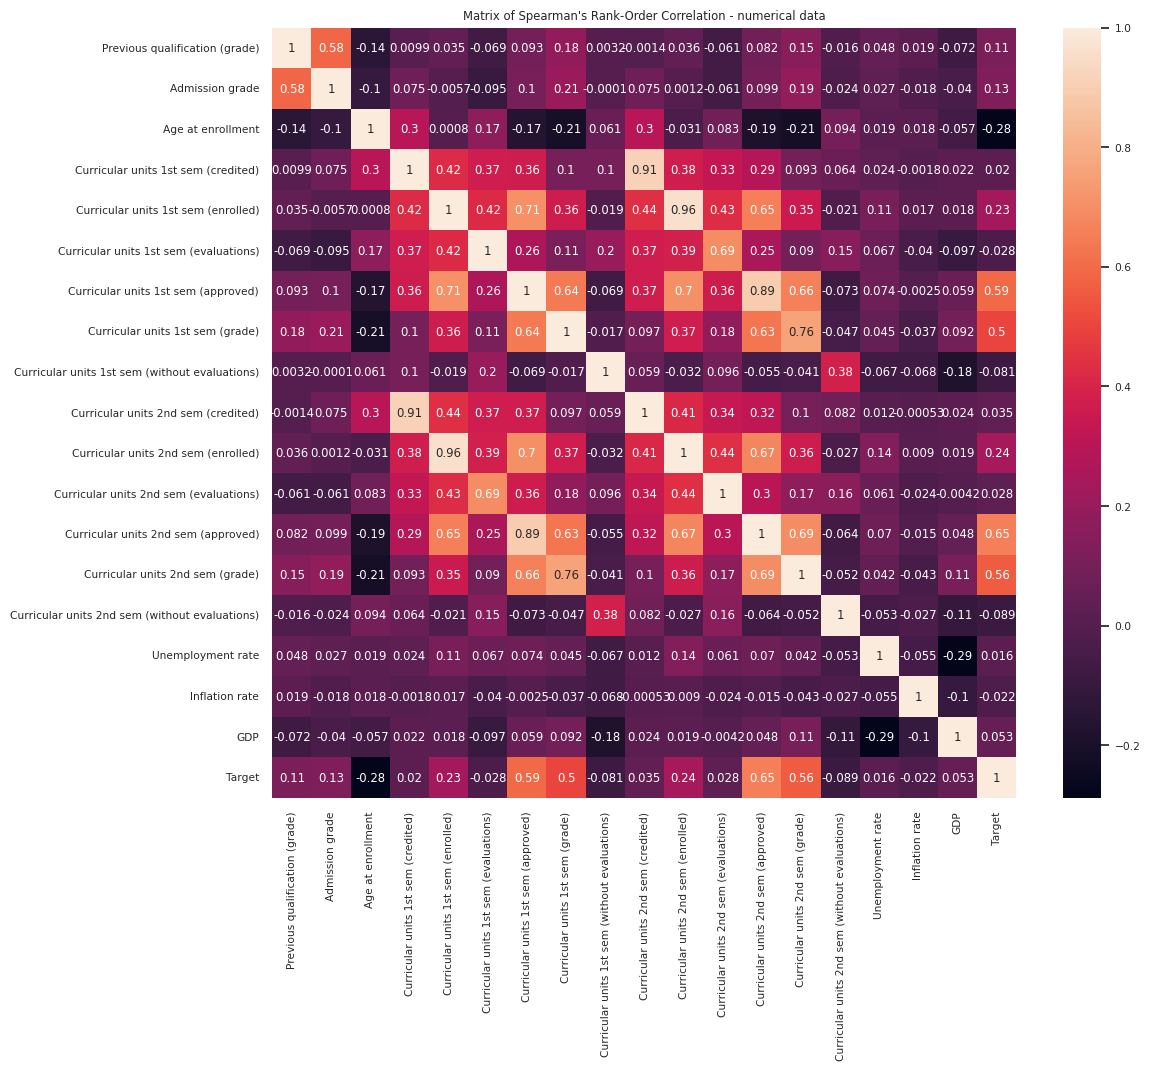

In [105]:
# Heatmap with individual correlations for numerical data
plt.figure(figsize = (12,10))
plt.title("Matrix of Spearman's Rank-Order Correlation - numerical data")
_ = sns.heatmap(numerical_matrix, annot = True, xticklabels= numerical_columns + ['Target'],
                yticklabels= numerical_columns + ['Target'])

In [106]:
# From numerical data removing all those columns which are not required
df = df.drop(columns = ['Unemployment rate', 'Inflation rate', 'GDP'], axis = 1)

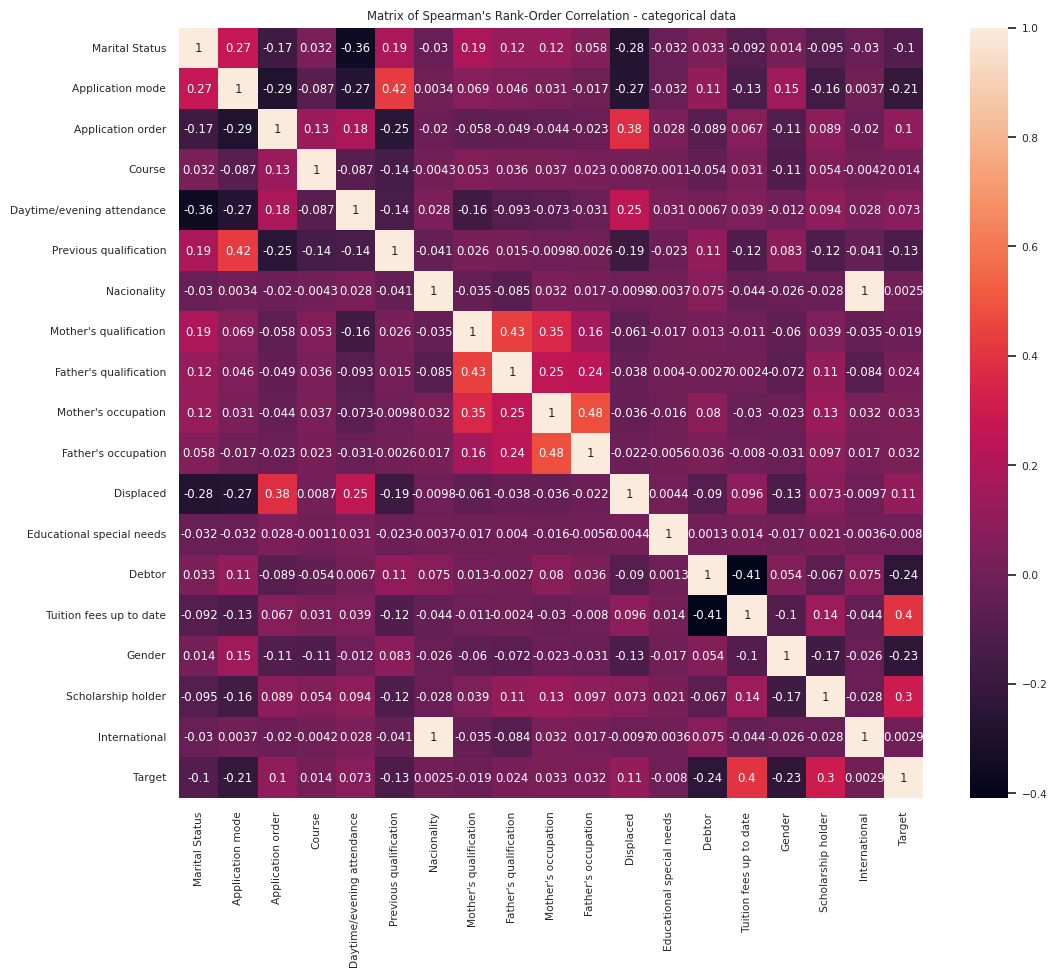

In [107]:
# Calculating correlations for categorical variables and making visualization
category_matrix = stats.spearmanr(df.drop(numerical_columns[:-3], axis = 1))[0]

plt.figure(figsize = (12,10))
plt.title("Matrix of Spearman's Rank-Order Correlation - categorical data")
_ = sns.heatmap(category_matrix, annot = True, xticklabels= list(df.drop(numerical_columns[:-3], axis = 1).columns),
                yticklabels= list(df.drop(numerical_columns[:-3], axis = 1).columns))

In [108]:
# Removing columns that are not neccesary
df = df.drop(columns = ['Nacionality', 'Marital Status', 'Application order',
                   'Displaced', "Mother's qualification", "Father's qualification",
                   "Mother's occupation", "Father's occupation", 'Previous qualification',
                   'International', 'Debtor', 'Educational special needs'], axis = 1)

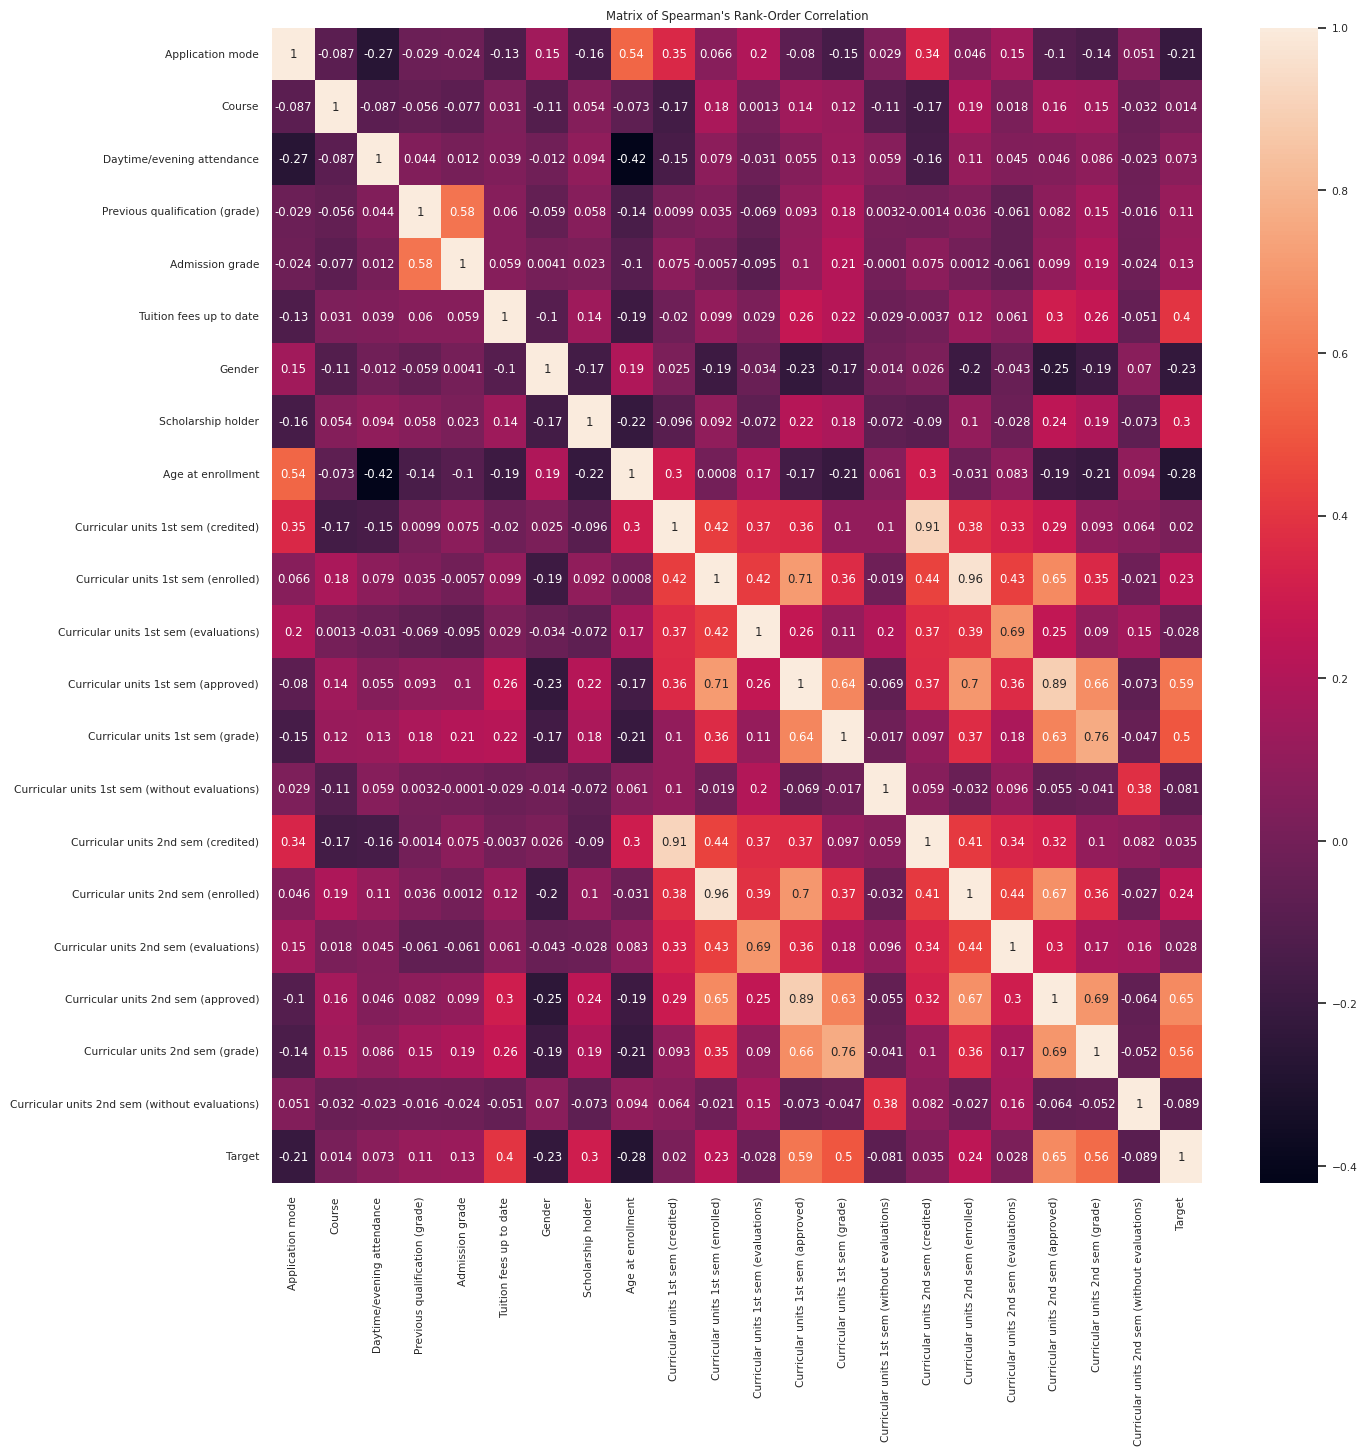

In [109]:
matrix = stats.spearmanr(df)[0]

plt.figure(figsize = (15,15))
plt.title("Matrix of Spearman's Rank-Order Correlation")
_ = sns.heatmap(matrix, annot = True, xticklabels= list(df.columns),
                yticklabels= list(df.columns))

In [110]:
df.shape

(4424, 22)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Course                                          4424 non-null   int64  
 2   Daytime/evening attendance                      4424 non-null   int64  
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Admission grade                                 4424 non-null   float64
 5   Tuition fees up to date                         4424 non-null   int64  
 6   Gender                                          4424 non-null   int64  
 7   Scholarship holder                              4424 non-null   int64  
 8   Age at enrollment                               4424 non-null   int64  
 9   Curricular units 1st sem (credited)      

# 4. Preparing data to training

In [112]:
# Obtaining values from features

data = df.drop(columns = 'Target', axis = 1).values
data

array([[  17.   ,  171.   ,    1.   , ...,    0.   ,    0.   ,    0.   ],
       [  15.   , 9254.   ,    1.   , ...,    6.   ,   13.667,    0.   ],
       [   1.   , 9070.   ,    1.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [   1.   , 9500.   ,    1.   , ...,    1.   ,   13.5  ,    0.   ],
       [   1.   , 9147.   ,    1.   , ...,    5.   ,   12.   ,    0.   ],
       [  10.   , 9773.   ,    1.   , ...,    6.   ,   13.   ,    0.   ]])

In [113]:
# Converting target names to numbers
target = df['Target']
target = target.replace({'Dropout' : 0,
                         'Enrolled' : 1,
                         'Graduate' : 2})
target = np.array(target.values)
target

array([0, 2, 0, ..., 0, 2, 2])

In [114]:
# Creating train and test sets, test size - 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2,
                                                    stratify = target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (3539, 21)
X_test shape: (885, 21)
y_train shape: (3539,)
y_test shape: (885,)


In [115]:
# Standarizing data to mean 0 and variance 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Means for X_train')
print([float(f'{X_train[:,i].mean():.4f}') for i in range(X_train.shape[1])])
print('\nMeans for X_test')
print([float(f'{X_test[:,i].mean():.4f}') for i in range(X_test.shape[1])])
print('\nVariance for X_train')
print([float(f'{(X_train[:,i].std())**2:.4f}') for i in range(X_train.shape[1])])
print('\nVariance for X_test')
print([float(f'{(X_test[:,i].std())**2:.4f}') for i in range(X_test.shape[1])])

Means for X_train
[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0]

Means for X_test
[0.0172, 0.03, -0.0017, -0.0058, -0.0102, 0.0071, 0.0348, -0.0158, 0.0548, 0.0004, 0.0197, 0.0022, -0.0084, -0.0153, 0.0607, 0.0203, -0.006, -0.0432, -0.02, -0.0261, 0.0578]

Variance for X_train
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Variance for X_test
[0.9766, 0.842, 1.0043, 1.0668, 1.0427, 0.9834, 1.0209, 0.9815, 1.1437, 0.9707, 1.0117, 1.0506, 1.0067, 0.9757, 1.5543, 1.0449, 0.9153, 0.974, 0.9751, 1.018, 1.6648]


# 5. Fitting dataset to models with various hyperparameters, searching the best

In [116]:
# Using class GridSearchCV, searching for the LinearSVC's best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

classifier_linSVC = LinearSVC()

linSVC_params = {
    'C' : [0.5, 0.8, 1, 2, 3, 4, 5, 6, 8, 10, 20]
}

grid_search_linSVC = GridSearchCV(classifier_linSVC, linSVC_params, cv = 5,
                                  n_jobs = -1, scoring = 'accuracy')
grid_search_linSVC.fit(X_train, y_train)

grid_search_linSVC.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=6)

In [117]:
# Accuracy score for training and test set
y_train_pred_linSVC = grid_search_linSVC.predict(X_train)
y_test_pred_linSVC = grid_search_linSVC.predict(X_test)

acc_score_train_linSVC = accuracy_score(y_train, y_train_pred_linSVC)
acc_score_test_linSVC = accuracy_score(y_test, y_test_pred_linSVC)
print(f'Accuracy score for train data: {acc_score_train_linSVC}')
print(f'Accuracy score for test data: {acc_score_test_linSVC}')

Accuracy score for train data: 0.7581237637750777
Accuracy score for test data: 0.751412429378531


In [118]:
# Checking how working KneighboursClassifier on the data, also using grid search
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier()

kN_params = {'n_neighbors' : [3, 5, 7, 9, 10, 11, 12, 13, 15, 20, 30, 50, 75],
             'weights' : ['uniform', 'distance'],
             'p' : [1,2]}
grid_search_kN = GridSearchCV(estimator = kn_classifier, param_grid = kN_params,
                              scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_search_kN.fit(X_train, y_train)

grid_search_kN.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [119]:
# Accuracy score
y_train_pred_kN = grid_search_kN.predict(X_train)
y_test_pred_kN = grid_search_kN.predict(X_test)

acc_score_train_kN = accuracy_score(y_train, y_train_pred_kN)
acc_score_test_kN = accuracy_score(y_test, y_test_pred_kN)

print(f'Accuracy score for train data: {acc_score_train_kN}')
print(f'Accuracy score for test data: {acc_score_test_kN}')

Accuracy score for train data: 0.783272110765753
Accuracy score for test data: 0.7468926553672316


In [120]:
# SVC model
from sklearn.svm import SVC

SVC_classifier = SVC()

params = [
    {'kernel' : ['linear'],
     'C' : [0.5, 1, 2, 4, 7, 10]},
    {'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 0.5, 1],
     'C' : [0.5, 1, 2, 3, 4, 5, 10]},
    {'kernel' : ['poly'],
     'degree' : [3,4,5],
     'C' : [0.5, 1, 2, 4, 10]}
]

grid_search_SVC = GridSearchCV(estimator = SVC_classifier, param_grid = params,
                               scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_search_SVC.fit(X_train, y_train)

grid_search_SVC.best_estimator_

SVC(C=10, gamma=0.01)

In [121]:
grid_search_SVC.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [122]:
grid_search_SVC.best_score_

0.7600971719447974

In [123]:
# Accuracy score
y_train_pred_SVC = grid_search_SVC.predict(X_train)
y_test_pred_SVC = grid_search_SVC.predict(X_test)

acc_score_train_SVC = accuracy_score(y_train, y_train_pred_SVC)
acc_score_test_SVC = accuracy_score(y_test, y_test_pred_SVC)

print(f'Accuracy score for train data: {acc_score_train_SVC}')
print(f'Accuracy score for test data: {acc_score_test_SVC}')

Accuracy score for train data: 0.7923142130545352
Accuracy score for test data: 0.768361581920904


In [124]:
# Decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()

tree_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 6, 7, 8, 9, 13, 18, 23, 30],
    'min_samples_leaf' : [1,2,3,4,5,6,7]
}

grid_search_tree = GridSearchCV(tree_classifier, tree_params, scoring = 'accuracy',
                                cv = 5, n_jobs = -1)

grid_search_tree.fit(X_train, y_train)

grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [125]:
y_train_pred_tree = grid_search_tree.predict(X_train)
y_test_pred_tree = grid_search_tree.predict(X_test)

acc_score_train_tree = accuracy_score(y_train, y_train_pred_tree)
acc_score_test_tree = accuracy_score(y_test, y_test_pred_tree)

print(f'Accuracy score for train data: {acc_score_train_tree}')
print(f'Accuracy score for test data: {acc_score_test_tree}')

Accuracy score for train data: 0.7699915230291042
Accuracy score for test data: 0.7593220338983051


In [126]:
# RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()

forest_params = {
    'n_estimators' : [50, 75, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10, 15, 20, 25, 30],
    'min_samples_leaf' : [1,2,3,4,5,6,7]
}

grid_search_forest = GridSearchCV(forest_classifier, forest_params,
                                  scoring = 'accuracy', n_jobs = -1)

grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=7)

In [127]:
grid_search_forest.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 7,
 'n_estimators': 100}

In [128]:
y_train_pred_forest = grid_search_forest.predict(X_train)
y_test_pred_forest = grid_search_forest.predict(X_test)

acc_score_train_forest = accuracy_score(y_train, y_train_pred_forest)
acc_score_test_forest = accuracy_score(y_test, y_test_pred_forest)

print(f'Accuracy score for train data: {acc_score_train_forest}')
print(f'Accuracy score for test data: {acc_score_test_forest}')

Accuracy score for train data: 0.8440237355185081
Accuracy score for test data: 0.7785310734463277


# 6. Comparison between models and choosing the best one

In [129]:
# Comparison of all models in terms of accuracy

accuracy_comparison = pd.DataFrame({'LinearSVC' : [round(acc_score_test_linSVC, 3)],
                                    'K_neighbors_classifier' : [round(acc_score_test_kN, 3)],
                                    'SVC' : [round(acc_score_test_SVC, 3)],
                                    'Decision_tree_classifier' : [round(acc_score_test_tree, 3)],
                                    'Random_forest_classifier' : [round(acc_score_test_forest, 3)]})
accuracy_comparison

,LinearSVC,K_neighbors_classifier,SVC,Decision_tree_classifier,Random_forest_classifier
0,0.751,0.747,0.768,0.759,0.779


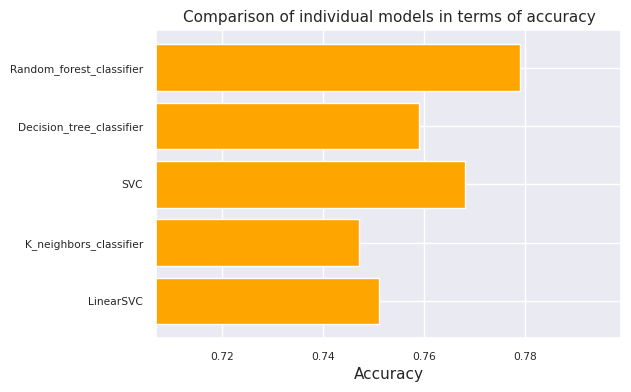

In [130]:
# Presenting models accuracy on the horizontal bar chart.
# In this case the best choice will be the random forest classifier.
plt.figure(figsize = (6,4))
plt.barh(y = accuracy_comparison.columns, width = accuracy_comparison.values[0],
         color = 'orange')
plt.xlabel('Accuracy', fontsize = 11)
plt.xlim(left = min(accuracy_comparison.values[0]) - 0.04,
         right = max(accuracy_comparison.values[0]) + 0.02)
plt.title('Comparison of individual models in terms of accuracy', fontsize = 11)
plt.show()

In [131]:
# Creating a confusion matrix of model predictions and calculating
# precision, recall and f1-score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import plotly.figure_factory as ff

def plot_confusion_matrix(y_test, y_pred, title = 'Confusion matrix'):
  cm = confusion_matrix(y_test, y_pred)
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1', 'pred_2'],
                    index = ['true_2', 'true_1', 'true_0'])

  print(classification_report(y_test, y_pred))

  fig = ff.create_annotated_heatmap(cm.values, x = list(cm.columns),
                                    y = list(cm.index), colorscale = 'ice',
                                    reversescale = True, showscale = True)
  fig.update_layout(width = 600, height = 500, title = title, font_size = 13,
                    title_pad_l = 50)
  fig.show()



plot_confusion_matrix(y_test, y_test_pred_forest, 'Random Forest Classifier - Confusion Matrix')

# The best predictions we can get for students, they will be graduate and for
# dropouts. The less accuracy is where student in fact will be still enrolled
# on the course after the end of the normal duration of study.

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       284
           1       0.60      0.30      0.40       159
           2       0.78      0.95      0.86       442

    accuracy                           0.78       885
   macro avg       0.74      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



In [132]:
import pickle

with open('predict_student_dropout_academic_success.pickle', 'wb') as f:
  pickle.dump(grid_search_forest, f)